In [2]:
import pandas as pd
import urllib.parse
import urllib.error
import pickle
import time
import sys
import glob
from IPython.display import clear_output
import geopandas as gpd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

countries_capitals_path = 'auxilary_data/countries_capitals.csv'

In [3]:
countries_capitals = pd.read_csv(countries_capitals_path)

# make a countries dictionary with FIPS as key
countries = countries_capitals.set_index('FIPS')['Country'].to_dict()

country_to_country_all = pd.read_csv('saved_data/country_to_country_all.csv')

In [4]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

/tmp/ipykernel_1192/3912264495.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


In [5]:
# find the middle of each goem in the world map
world['coords'] = world['geometry'].apply(lambda x: x.representative_point().coords[:])

In [6]:
url_fip_cap = "https://cloford.com/resources/codes/index.htm"

response = requests.get(url_fip_cap)
soup = BeautifulSoup(response.text, "html.parser")

# find the table with the country codes
table_capi = soup.find_all("table")[4]

countries_iso = pd.read_html(str(table_capi))[0]

fips_to_iso_dict = countries_iso.set_index('FIPS')['ISO (3)'].to_dict()

countries_capitals["ISO"] = countries_capitals["FIPS"].map(fips_to_iso_dict)

countries_capitals.head()

/tmp/ipykernel_1192/266788074.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  countries_iso = pd.read_html(str(table_capi))[0]


,FIPS,Country,Continent,Region,Capital,ISO
0,AF,Afghanistan,Asia,South Asia,Kabul,AFG
1,AL,Albania,Europe,South East Europe,Tirana,ALB
2,AG,Algeria,Africa,Northern Africa,Algiers,DZA
3,AQ,American Samoa,Oceania,Pacific,Pago Pago,ASM
4,AN,Andorra,Europe,South West Europe,Andorra la Vella,AND


In [7]:
combined_f = country_to_country_all.drop(columns = ["Date", "Unnamed: 2"])
combined_f = combined_f.groupby(["Target country"]).mean().sort_values(by = "Target country")
combined_f

,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Target country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,61.153794,0.722672,0.407648,0.233930,0.123163,1.084218,0.690159,0.186505,3.598944,0.778591,...,1.125398,0.818044,0.913777,0.240189,4.074993,0.431421,0.033245,0.589670,0.060320,0.812661
Albania,0.097081,29.539962,0.046415,0.041323,0.016827,0.186553,0.033172,0.086125,0.395863,0.060133,...,0.098717,0.104755,0.070581,0.027824,0.053563,0.037084,0.002799,0.023954,0.019373,0.039245
Algeria,0.260947,0.084421,39.857927,0.356128,0.073552,0.082390,0.042973,0.097514,0.228640,0.656803,...,0.693201,0.115633,0.097019,0.135504,0.097806,0.259118,0.021097,0.518425,0.622939,0.670658
American Samoa,0.002766,NaN,0.001862,0.001263,0.000168,0.000647,0.010499,0.002519,0.000508,0.000562,...,0.003072,0.007657,0.022266,NaN,NaN,0.000184,0.000111,0.000850,NaN,0.003364
Andorra,0.011695,0.033549,0.012754,0.008019,0.051678,0.036054,0.005952,0.041431,0.016540,0.007418,...,0.011919,0.023211,0.009281,0.055879,0.011520,0.104778,0.000376,0.007867,0.021544,0.005676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank,0.196461,0.018665,0.417283,0.081491,0.061972,0.033764,0.130337,0.116802,0.046375,0.339681,...,0.600017,0.241758,0.243883,0.139630,0.022794,0.133676,0.005492,0.640534,0.035309,0.096170
Western Sahara,0.022899,0.001342,2.353888,0.049641,0.001689,0.001401,0.012616,0.004016,0.003906,0.027034,...,0.028573,0.018013,0.015843,0.002560,NaN,0.006097,0.000380,0.024511,0.035555,0.078364
Yemen,1.119845,0.107233,0.600895,0.178850,0.045814,0.248289,0.158152,0.198150,0.264992,2.801728,...,2.509783,0.293079,0.357360,0.089749,0.072305,0.129431,0.012420,51.499669,0.057324,0.233228


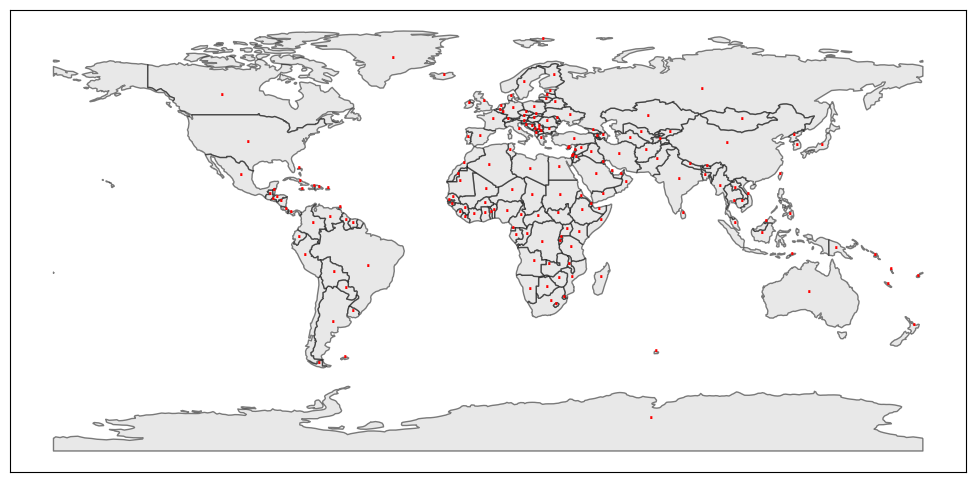

In [11]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot()

world.plot(
    ax=ax,
    color="lightgrey",
    edgecolor="black",
    alpha=0.5,
)

ax.set_xticks([])
ax.set_yticks([])

# plot a point for the middle of each country on the map
for idx, row in world.iterrows():
    ax.text(
        row.coords[0][0],
        row.coords[0][1],
        countries.get(row["iso_a3"], "."),
        color="red",
        horizontalalignment="center",
        fontsize=15,
    )

plt.show()